# Data Gathering

In [48]:
import steamreviews

# Basic libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sd
import numpy as np

# For text cleaning 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import json
import pandas as pd

In [14]:
# Game: Momodora: Reverie Under The Moonlight
app_id = 428550
# Game: Pizza Game
# app_id = 710710

# set request parameters 
request_params = {}
request_params['language'] = 'english'

review_dict, query_count = steamreviews.download_reviews_for_app_id(app_id)
# review_dict = steamreviews.load_review_dict(app_id)

[appID = 428550] expected #reviews = 8557


In [16]:
review_dict['query_summary']

{'num_reviews': 100,
 'review_score': 8,
 'review_score_desc': 'Very Positive',
 'total_positive': 8040,
 'total_negative': 517,
 'total_reviews': 8557}

In [20]:
data = steamreviews.load_review_dict(app_id)
data = data['reviews']
review_dataset = []

for id_num, info in data.items():
    review = {'id_num': id_num,
              'review':info['review'],
              'language':info['language'],
              'voted_up':info['voted_up']}
    
    review_dataset.append(review)

In [31]:
review_df = pd.DataFrame(review_dataset)

In [32]:
review_df.sample(10)

,id_num,review,language,voted_up
596,79331101,I played for like 20 minutes a few years ago a...,english,True
6226,29931571,This is such a great little metroidvania. Dark...,english,True
6544,28990899,A very well done indie game that if anything i...,english,True
5686,32755046,This game is probably one of the best metroidv...,english,True
3994,42773359,Scheint mir ein super Spiel zu sein aber was m...,german,False
5878,31558620,갓겜,koreana,True
458,83347818,topppp,brazilian,True
3817,43696725,果然我的真爱还是横板游戏,schinese,True
5137,35735189,심플하고 재밌네요,koreana,True
3053,47770885,Like Dark Souls but as a 2D platformer with cu...,english,True


Total number of reviews: 8557

Languages: ['schinese' 'english' 'portuguese' 'spanish' 'brazilian' 'french'
 'koreana' 'italian' 'japanese' 'latam' 'russian' 'thai' 'turkish'
 'polish' 'tchinese' 'dutch' 'german' 'ukrainian' 'czech' 'hungarian'
 'finnish' 'swedish' 'bulgarian' 'vietnamese' 'danish' 'greek' 'norwegian']

Number of languages: 27

english       3809
schinese      1368
brazilian     1045
koreana        571
spanish        570
russian        406
japanese       221
french         134
tchinese       119
latam           83
german          70
italian         42
polish          33
turkish         23
thai            17
portuguese      17
dutch            6
czech            4
finnish          3
hungarian        3
swedish          3
danish           3
ukrainian        2
bulgarian        2
vietnamese       1
norwegian        1
greek            1
Name: language, dtype: int64



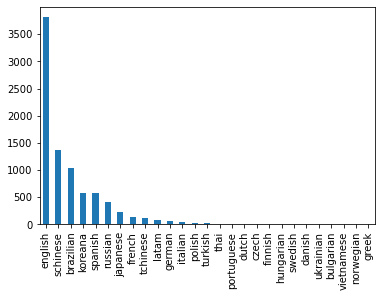

In [75]:
# languages
# tchinese = traditional Chinese 
# schinese = simplified Chinese
review_df_lan = review_df['language']
print('Total number of reviews: {}'.format(len(review_df_lan)))
print()
print('Languages: {}'.format(review_df_lan.unique()))
print()
print('Number of languages: {}'.format(len(review_df_lan.unique())))
print()
print(review_df_lan.value_counts())
print()
review_df_lan.value_counts().plot.bar()
plt.show()

<AxesSubplot:>

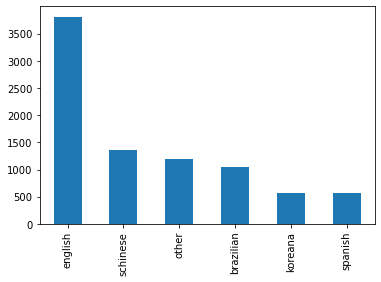

In [83]:
# only get the top 5 languages
review_df_lan.replace(review_df_lan.value_counts().index[5:], 'other').value_counts().plot.bar()

In [101]:
reviews_top = review_df_lan.replace(review_df_lan.value_counts().index[1:], 'other').value_counts()
num_reviews_eng = reviews_top.english
print('Number of English reviews accounts for {}% of total reviews.'.format(round(num_reviews_eng/len(review_df_lan)* 100)))

Number of English reviews accounts for 45% of total reviews.


- English is the prominent language as expected, accounts for 45% of the reviews. In our study, we will only work with English reviews as English offers the most data. 

In [8]:
text_df = text_df[text_df['Language']=='english']
text_df = text_df.drop(['Steam ID'], axis=1)

In [10]:
text_df.sample(10)

,Steam ID,Review,Language,Recommended
8211,21935178,"This is game is amazing, especially for the pr...",english,True
2050,54885658,예전에 모모도라 3를 깨고 이번에 미노리아 구입 전에 클리어 도전했습니다.\n역시 ...,koreana,True
589,79564330,Esse jogo é sensacional. Me despertou um forte...,brazilian,True
7235,25833689,好评的原声音乐，流畅的打击感，隐藏要素的植入十分恰当,schinese,True
1991,55594515,An interesting platformer with a cute artstyle...,english,False
2961,48029577,I thought it was a pretty good game. It looked...,english,True
4751,37821349,"Eu já esperava que o jogo fosse bom, mas quand...",brazilian,True
4383,40242521,Well this is a delightful little game. Remind...,english,True
787,75873782,Played it on hard mode and had a lot of fun. T...,english,True
1168,70199318,2020/06/03第一次good ending通关。顺手把全boss无伤做了。\n\n总体...,schinese,True


# Basic Data Analysis

D:\Anaconda3\envs\steam_insider\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Recommended', ylabel='count'>

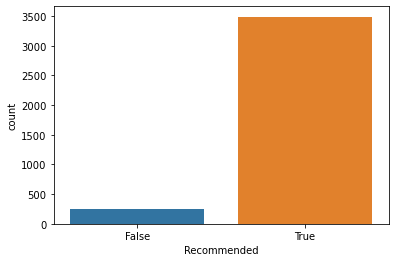

In [10]:
sd.countplot('Recommended',data=text_df)

In [11]:
text_df['Review'] = text_df['Review'].astype(str)
text_df['Length'] = text_df['Review'].apply(lambda x : len(x.split()))

In [12]:
recc_length = text_df[text_df['Recommended'] == True]
norecc_length = text_df[text_df['Recommended'] == False]

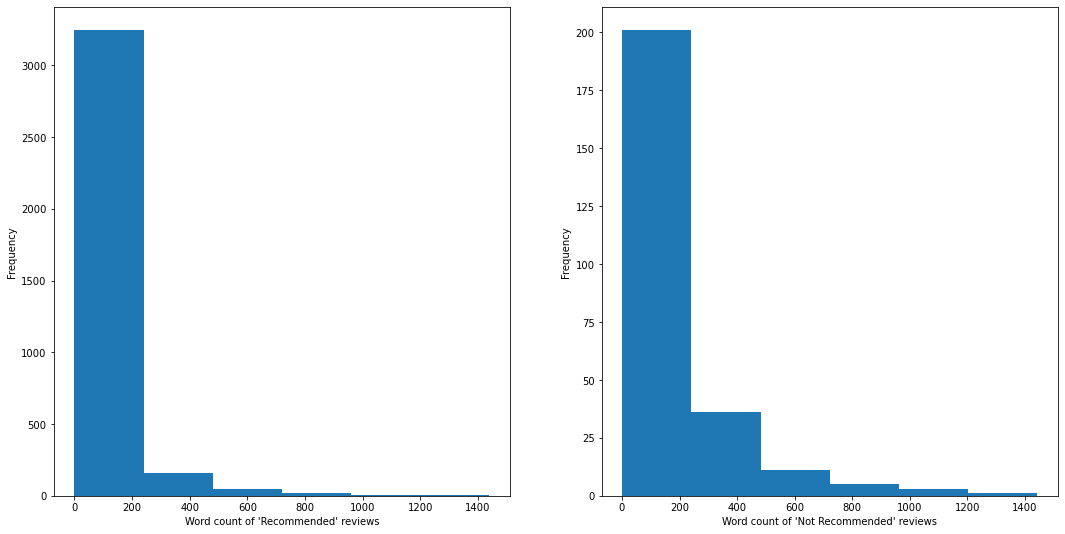

In [13]:
# use same scale 
fig, (ax1,ax2) = pypl.subplots(1,2,figsize=(18,9))

ax1.hist(recc_length['Length'].values,bins=6)
ax1.set(xlabel='Word count of \'Recommended\' reviews',ylabel='Frequency')
ax2.hist(norecc_length['Length'].values,bins=6)
ax2.set(xlabel='Word count of \'Not Recommended\' reviews',ylabel='Frequency')
pypl.show()

# Data Cleaning

In [14]:
text_df.head(10)

,Review,Language,Recommended,Length
1,Absolutely loved this game and the entire atmo...,english,True,17
2,"Good game overall, would recommend",english,True,5
11,I recently finished this game after looking th...,english,True,173
13,Better than Hollow Knight tbh,english,True,5
15,This is a game you really need to take your ti...,english,True,71
17,"Cute, fun and addictive metroidvania that pull...",english,True,22
18,Hardcore in the bad way. Trial and error desig...,english,False,19
30,"Graphically pretty, challenging but not frustr...",english,True,65
31,"If you love Castlevania, you'll probably feel ...",english,True,30
35,Recommended to me by a friend who knew I loved...,english,True,76


In [15]:
import string

contract = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

stopword = stopwords.words('english')
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def penntag(pen):
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[pen[:2]]
    except:
        return 'n'


def comment_cleaner(comm):
    temp_comm = []
    megos = ' '

    # Uncontract any contracted words in our sentences
    uncontracted = ' '.join([contract[word] if word in contract else word for word in comm.lower().split()])

    # Remove any stopwords in our sentences
    stopwords_removed = [word for word in uncontracted.lower().split() if word not in stopword]

    # Use parts-of-speech to regain context after lemmatization 
    POS_words = nltk.pos_tag(stopwords_removed)

    for i in range(0, len(POS_words)):

        # Lemmatize words based on whether they are a noun, preposition etc. based on position
        lemmas = lemma.lemmatize(POS_words[i][0], pos=penntag(POS_words[i][1]))

        # Append or join the words together
        temp_comm.append(lemmas)
    
    # Combine the words into a sentence
    megos = ' '.join(word for word in temp_comm)
    return megos

In [16]:
text_df['Review'] = text_df['Review'].str.replace('[^\w\s]',' ')
text_df['Review'] = text_df['Review'].str.replace('[\d+]',' ')
text_df['Review'] = text_df['Review'].str.replace('(^| ).(( ).)*( |$)',' ')
text_df['Review'] = text_df['Review'].apply(lambda r : comment_cleaner(r))

In [17]:
text_df.head(10)

,Review,Language,Recommended,Length
1,absolutely loved game entire atmosphere everyt...,english,True,17
2,good game overall would recommend,english,True,5
11,recently finish game look steam library game t...,english,True,173
13,well hollow knight tbh,english,True,5
15,game really need take time rush every section ...,english,True,71
17,cute fun addictive metroidvania pull enjoyable...,english,True,22
18,hardcore bad way trial error design hidden ins...,english,False,19
30,graphically pretty challenge frustratingly har...,english,True,65
31,love castlevania probably feel home lot say st...,english,True,30
35,recommend friend know love waifus man game tur...,english,True,76


In [18]:
recc_df = text_df[text_df['Recommended']==True]
notrecc_df = text_df[text_df['Recommended']==False]

In [19]:
count_vect = CountVectorizer(ngram_range=(2,2),stop_words=['game']).fit(text_df['Review'])

In [20]:
def plot_common_ngrams(texts):

    words = count_vect.transform(texts)
    sum_words = words.sum(axis=0)

    ngram_count = []

    for word,index in count_vect.vocabulary_.items():
        ngram_count.append((word,sum_words[0,index]))

    sorted_ngram_count = sorted(ngram_count,key=lambda x: x[1],reverse=True)

    sorted_ngram_count = sorted_ngram_count[:30]

    x = []
    y = []

    for i in sorted_ngram_count:
        x.append(i[0])
        y.append(i[1])

    fig = pypl.figure(figsize=(15,15))
    pypl.barh(x,y)
    fig.gca().invert_yaxis()
    return fig

D:\Anaconda3\envs\steam_insider\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


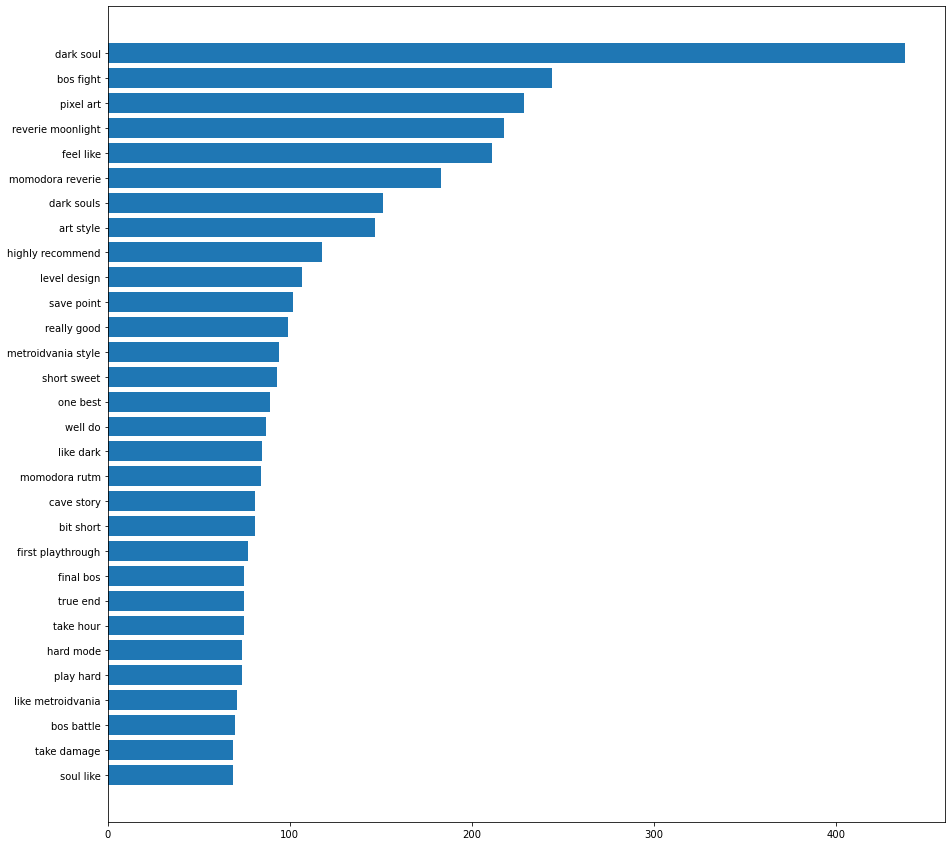

In [21]:
pos_plot = plot_common_ngrams(recc_df['Review'])
pos_plot.show()

D:\Anaconda3\envs\steam_insider\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


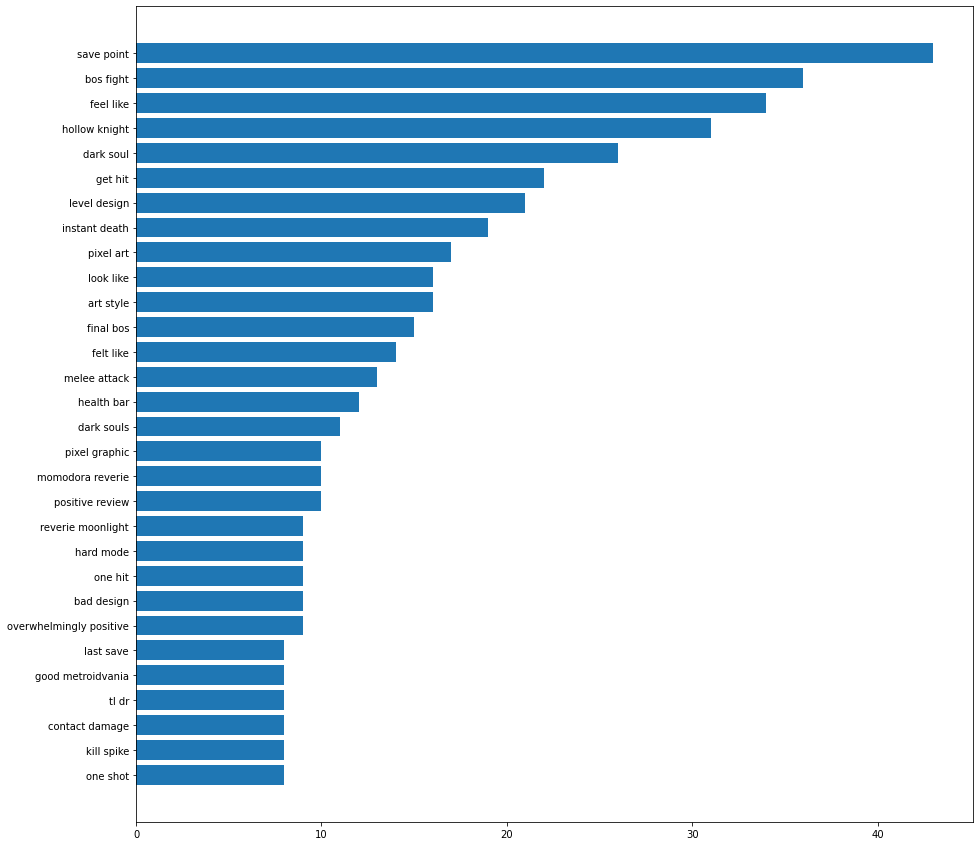

In [22]:
neg_plot = plot_common_ngrams(notrecc_df['Review'])
neg_plot.show()

# Tf-Idf modeling

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfvec = TfidfVectorizer(ngram_range=(2,2),stop_words=['game'],max_df=0.9,use_idf=True)
tfvec.fit(text_df['Review'])

TfidfVectorizer(max_df=0.9, ngram_range=(2, 2), stop_words=['game'])

In [25]:
mx = tfvec.transform(notrecc_df['Review'])
fv_tfidf = mx[0]
pdf = pd.DataFrame(fv_tfidf.T.todense(),index=tfvec.get_feature_names(),columns=['tfidf'])
pdf.sort_values(by=["tfidf"],ascending=False)[:15]

,tfidf
hidden instakill,0.285144
save fuck,0.285144
hardcore bad,0.285144
error design,0.285144
instakill trap,0.285144
way trial,0.285144
design hidden,0.285144
trap lose,0.285144
lose everything,0.261989
everything since,0.261989


In [26]:
mx = tfvec.transform(recc_df['Review'])
fv_tfidf = mx[0]
pdf = pd.DataFrame(fv_tfidf.T.todense(),index=tfvec.get_feature_names(),columns=['tfidf'])
pdf.sort_values(by=["tfidf"],ascending=False)[:15]

,tfidf
include visuals,0.341703
feel clean,0.341703
entire atmosphere,0.341703
visuals highly,0.341703
loved entire,0.341703
clean include,0.341703
atmosphere everything,0.325472
absolutely loved,0.297724
everything feel,0.269976
highly recommend,0.178813


# Topic Modeling

In [27]:
from sklearn.decomposition import LatentDirichletAllocation

In [28]:
lda = LatentDirichletAllocation(n_components=10)
lda_count = count_vect.fit_transform(recc_df['Review'])

lda.fit_transform(lda_count)

array([[0.00909143, 0.00909165, 0.00909103, ..., 0.91817636, 0.00909173,
        0.00909202],
       [0.02500079, 0.02500085, 0.02500181, ..., 0.02500123, 0.02500129,
        0.02500462],
       [0.0013334 , 0.00133342, 0.98799918, ..., 0.00133348, 0.00133344,
        0.00133339],
       ...,
       [0.025     , 0.025     , 0.02500297, ..., 0.77499422, 0.025     ,
        0.025     ],
       [0.01666667, 0.01666705, 0.01666779, ..., 0.84999507, 0.01666667,
        0.01666785],
       [0.01250097, 0.01250141, 0.01250169, ..., 0.88748308, 0.01250617,
        0.01250136]])

In [29]:
topic_arr = []

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        temps = []
        for i in topic.argsort()[:-top_n-1:-1]:    
            temps.append((vectorizer.get_feature_names()[i]))
        topic_arr.append(temps)
    
print_topics(lda,count_vect)

In [30]:
rows = [f'Topic {i}' for i in range(0,10)]
tpi = pd.DataFrame(topic_arr)
tpi.index = rows
tpi.T

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,dark soul,dark soul,dark soul,dark soul,dark soul,dark soul,reverie moonlight,dark soul,dark soul,reverie moonlight
1,feel like,feel like,pixel art,pixel art,reverie moonlight,bos fight,momodora reverie,feel like,bos fight,bos fight
2,pixel art,reverie moonlight,bos fight,bos fight,bos fight,pixel art,pixel art,bos fight,feel like,momodora reverie
3,dark souls,pixel art,dark souls,feel like,momodora reverie,feel like,dark soul,pixel art,save point,one best
4,really good,bos fight,like dark,worth price,pixel art,momodora reverie,feel like,pretty good,art style,pixel art
5,bos fight,momodora reverie,art style,dark souls,well do,reverie moonlight,art style,level design,highly recommend,dark soul
6,highly recommend,first run,soul like,first playthrough,really good,dark souls,bos fight,reverie moonlight,momodora rutm,dark souls
7,recommend anyone,dark souls,like metroidvania,metroidvania style,feel like,metroidvania style,level design,hard mode,dark souls,highly recommend
8,really fun,highly recommend,bit short,save point,highly recommend,well worth,maple leaf,play hard,pixel art,short sweet
9,short sweet,art style,take hour,reverie moonlight,one best,great metroidvania,cave story,bos battle,one best,art style


In [31]:
lda = LatentDirichletAllocation(n_components=10)
rfd = count_vect.fit_transform(notrecc_df['Review'])

dlad = lda.fit_transform(rfd)

In [32]:
topa = []

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        topi = []
        for i in topic.argsort()[:-top_n-1:-1]:    
            topi.append((vectorizer.get_feature_names()[i]))
        topa.append(topi)
    
print_topics(lda,count_vect)

In [33]:
rows = [f'Topic {i}' for i in range(0,10)]
tpi = pd.DataFrame(topa)
tpi.index = rows
tpi.T

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,hollow knight,keyboard control,hollow knight,art style,feel like,pixel art,dark soul,get hit,feel like,save point
1,save point,look elsewhere,feel like,design choice,bos fight,felt like,pixel graphic,save point,level design,reverie moonlight
2,bos fight,way short,save point,positive review,kill spike,final bos,bos fight,bos fight,hollow knight,symphony night
3,nothing happen,dark soul,melee attack,look good,bad design,dark soul,save point,hollow knight,like metroidvania,level design
4,art style,art style,instant death,hollow knight,save point,art style,feel like,level design,bos fight,dark soul
5,tl dr,little variety,blind forest,good look,level design,anything else,retro pixel,melee attack,could much,momodora reverie
6,final bos,different attack,ori blind,save point,look like,bos fight,look like,easy avoid,one hit,instant death
7,feel like,worth price,souls series,like go,instant kill,bad end,roll hit,good metroidvania,axiom verge,pixel art
8,would recommend,regular enemy,dark souls,go buy,contact damage,enemy type,really bad,boss attack,good control,get hit
9,collision damage,go back,bos fight,seem like,hard mode,bug reward,hollow knight,get good,health bar,every time
